Make a thorough analysis of a text dataset
Ways of analysing text:

Run the sentiment analysis on the text — are there labels in the dataset that you can compare these results against

Run topic modelling on the text— what topics emerge, are any of these topics intelligible or useful

Do some other form of analysis specific to the dataset (checkout https://pudding.cool/ for inspiration)

In [133]:
pip install snownlp


     ---------------------------------------- 0.0/37.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/37.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/37.6 MB 1.4 MB/s eta 0:00:26
     ---------------------------------------- 0.4/37.6 MB 3.4 MB/s eta 0:00:12
      --------------------------------------- 0.9/37.6 MB 4.9 MB/s eta 0:00:08
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s eta 0:00:07
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s eta 0:00:07
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s eta 0:00:07
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s eta 0:00:07
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s eta 0:00:07
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s eta 0:00:07
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s eta 0:00:07
     - -------------------------------------- 1.0/37.6 MB 5.5 MB/s

In [121]:
# Basic libraries
import re
import nltk
import numpy as np
import pandas as pd

# NLTK utils
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# SK-Learn classification report for evaluating sentiment analysis
from sklearn.metrics import classification_report

# Make wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

# for Chart
import seaborn as sns

#count comments
from collections import Counter

#Get sentiment for Chinese Comments
from snownlp import SnowNLP


In [105]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [106]:
# Function originally from: https://www.programcreek.com/python/?CodeExample=get%20wordnet%20pos
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Load my dataset in
(Note that this dataset comes from ____ at ____.)


In [107]:
df = pd.read_csv('C:/Users/ROG/Documents/GitHub/NLP_TianQiu/data/DMSC.csv')
df



,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404
1,1,Avengers Age of Ultron,复仇者联盟2,2017-01-22,2,更深的白色,2015-04-24,2,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,2,Avengers Age of Ultron,复仇者联盟2,2017-01-22,3,有意识的贱民,2015-04-26,2,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,3,Avengers Age of Ultron,复仇者联盟2,2017-01-22,4,不老的李大爷耶,2015-04-23,4,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,4,Avengers Age of Ultron,复仇者联盟2,2017-01-22,5,ZephyrO,2015-04-22,2,虽然从头打到尾，但是真的很无聊啊。,723
...,...,...,...,...,...,...,...,...,...,...
2125051,2125051,Zootopia,疯狂动物城,2017-01-04,141196,猫的烟火尾巴,2016-03-06,4,真好看 兔子警官又美有善良又可爱~简直理想结婚对象！每一个动物造型都是那么赞~,0
2125052,2125052,Zootopia,疯狂动物城,2017-01-04,141197,Tosta,2016-03-05,5,六星好评！像头脑特工队那样惊喜！,0
2125053,2125053,Zootopia,疯狂动物城,2017-01-04,141198,風立ちぬ,2016-03-11,4,欢乐而又深刻，是童话故事更是政治寓言。,0
2125054,2125054,Zootopia,疯狂动物城,2017-01-04,141199,P I T T,2016-03-05,5,对现实世界歧视和偏见的影射妙哉妙哉，不要害怕打破常规，try everything,0


In [108]:
df['Movie_Name_EN'].value_counts()

Movie_Name_EN
Zootopia                                      137511
CUG King of Heroes                            133393
The Continent                                 120200
The Ghouls                                    113687
Your Name                                     113260
Goodbye Mr. Loser                             109162
Train to Busan                                102876
La La Land                                     96620
Journey to the West The Demons Strike Back     91452
Tiny Times 1.0                                 88903
Lost In Thailand                               85677
Big Fish and Begonia                           83692
The Great Wall                                 83173
Journey to the West Conquering the Demons      79962
The Avengers                                   78281
The Mermaid                                    73882
Soulmate                                       68359
Captain America Civil War                      64410
Transformers Age of Extinction  

In [109]:
print(df.columns)


Index(['ID', 'Movie_Name_EN', 'Movie_Name_CN', 'Crawl_Date', 'Number',
       'Username', 'Date', 'Star', 'Comment', 'Like'],
      dtype='object')


In [110]:
# Due to the reason that the dataset is so big so I will extract the data form 'Avengers Age of Ultron'
Avengers_rows = df[df['Movie_Name_EN'] == 'Avengers Age of Ultron']

In [111]:
#As we need only 3 columns for sentiment analysis, we are going to drop rest of the columns
df.drop(['Movie_Name_EN',	'Movie_Name_CN','Crawl_Date','Number','Username','Date'], axis=1, inplace=True)
df.isnull().sum()

ID         0
Star       0
Comment    0
Like       0
dtype: int64

In [112]:
# transform to the positive and negative

def polarity (row):
  if row['Star'] >= 4: # bigger or equal to 4 stars are positive
    return '1'
  if row['Star'] <= 3: # smaller or equal to 3 stars are negative
    return '0'

Avengers_rows['Star'] = Avengers_rows.apply(lambda row: polarity(row), axis=1)

C:\Users\ROG\AppData\Local\Temp\ipykernel_21396\598172165.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avengers_rows['Star'] = Avengers_rows.apply(lambda row: polarity(row), axis=1)


In [113]:
Avengers_rows['Star'].value_counts()

Star
0    27981
1    26172
Name: count, dtype: int64

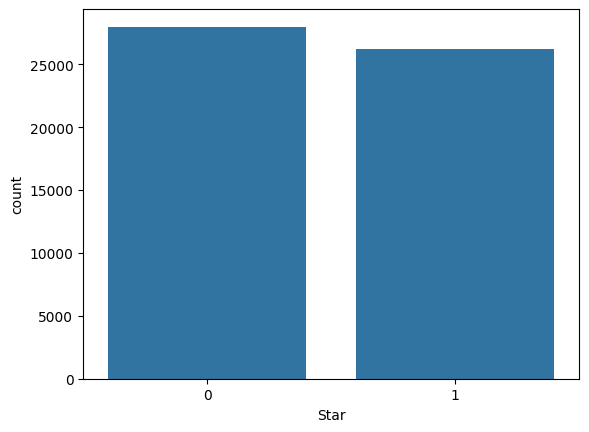

In [119]:
sns.countplot(x=Avengers_rows['Star'])
plt.show()

In [118]:
Avengers_rows_filter=Avengers_rows[['Star','Comment','Like']]
Avengers_rows_filter

,Star,Comment,Like
0,0,连奥创都知道整容要去韩国。,2404
1,0,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,0,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,1,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,0,虽然从头打到尾，但是真的很无聊啊。,723
...,...,...,...
54148,1,妮妮实力背锅。,0
54149,1,补充一点快银和绯红女巫的身世：快银（Quicksilver）是Marvel漫画中的超级英雄...,0
54150,1,炫酷屌炸天，剧情是什么，能吃嘛，呵呵呵呵呵,0
54151,1,反浩克装甲，举锤子大赛。中二哥哥与冷静的我。手撕奥创。旺达旺达旺达，以上。顺带一提，寡姐和...,0


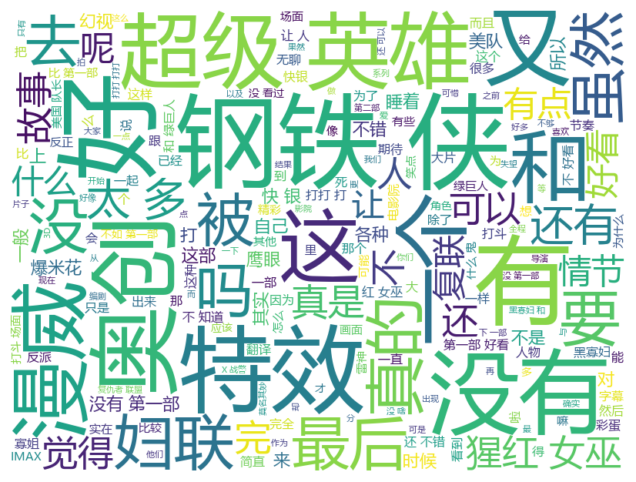

In [115]:
# Assuming Avengers_rows['Comment'] is a Series object containing multiple comments
comments = Avengers_rows['Comment'].astype(str)  # Ensure the data type of the comment column is string

# 自定义停用词列表
stop_words = ['的', '了', '是', '我', '你', '他', '她','啊','也','就是','感觉','在','剧情','看','吧','就','都','但','还是','电影','但是','不过']  # 添加其他停用词

# 使用 jieba 分词并过滤停用词
filtered_text = ' '.join([' '.join(word for word in jieba.cut(comment) if word not in stop_words) for comment in comments])
# Generate WordCloud object, specifying the font file path for Chinese support
font_path = 'C:/Windows/Fonts/msyh.ttc'  # Use the actual path for the 'Microsoft YaHei' font
wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    font_path=font_path).generate(filtered_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [160]:
def get_sentiment(text):
    score = SnowNLP(text).sentiments
    
    return score

# 例子
result = get_sentiment('挺没意思的，特别疲劳，而且3d几乎没效果，不建议去电影院烧钱了。看来只有Xmen才能拯救Avengers系列了')
print(result)

0


In [162]:
# 对每条评论进行情感分析
Avengers_rows_filter['sentiment'] = Avengers_rows_filter['Comment'].apply(lambda x: SnowNLP(x).sentiments)

# 将情感得分大于0.5的设为1，否则设为0
Avengers_rows_filter['sentiment'] = Avengers_rows_filter['sentiment'].apply(lambda x: 1 if x > 0.5 else 0)

# 显示结果
print(Avengers_rows_filter[['Comment', 'sentiment']])


                                                 Comment  sentiment
0                                          连奥创都知道整容要去韩国。          0
1       非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...          0
2       2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...          1
3       《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...          1
4                                      虽然从头打到尾，但是真的很无聊啊。          0
...                                                  ...        ...
54148                                            妮妮实力背锅。          1
54149   补充一点快银和绯红女巫的身世：快银（Quicksilver）是Marvel漫画中的超级英雄...          1
54150                              炫酷屌炸天，剧情是什么，能吃嘛，呵呵呵呵呵          1
54151   反浩克装甲，举锤子大赛。中二哥哥与冷静的我。手撕奥创。旺达旺达旺达，以上。顺带一提，寡姐和...          1
54152                                  忽略剧情，imax还是看得炒鸡爽的          1

[54153 rows x 2 columns]


C:\Users\ROG\AppData\Local\Temp\ipykernel_21396\1497498734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avengers_rows_filter['sentiment'] = Avengers_rows_filter['Comment'].apply(lambda x: SnowNLP(x).sentiments)
C:\Users\ROG\AppData\Local\Temp\ipykernel_21396\1497498734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avengers_rows_filter['sentiment'] = Avengers_rows_filter['sentiment'].apply(lambda x: 1 if x > 0.5 else 0)


In [165]:
Avengers_rows_filter['Sentiment'] = Avengers_rows_filter['Comment'].apply(get_sentiment)
Avengers_rows_filter

C:\Users\ROG\AppData\Local\Temp\ipykernel_21396\2680166485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avengers_rows_filter['Sentiment'] = Avengers_rows_filter['Comment'].apply(get_sentiment)


,Star,Comment,Like,sentiment,Sentiment
0,0,连奥创都知道整容要去韩国。,2404,0,0
1,0,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231,0,0
2,0,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052,1,1
3,1,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045,1,1
4,0,虽然从头打到尾，但是真的很无聊啊。,723,0,0
...,...,...,...,...,...
54148,1,妮妮实力背锅。,0,1,1
54149,1,补充一点快银和绯红女巫的身世：快银（Quicksilver）是Marvel漫画中的超级英雄...,0,1,1
54150,1,炫酷屌炸天，剧情是什么，能吃嘛，呵呵呵呵呵,0,1,1
54151,1,反浩克装甲，举锤子大赛。中二哥哥与冷静的我。手撕奥创。旺达旺达旺达，以上。顺带一提，寡姐和...,0,1,1


In [166]:
print(Avengers_rows_filter['Sentiment'].value_counts())

print(Avengers_rows_filter['Star'].value_counts())

Sentiment
1    36645
0    17508
Name: count, dtype: int64
Star
0    27981
1    26172
Name: count, dtype: int64


In [167]:
correlation = Avengers_rows_filter['Star'].corr(Avengers_rows_filter['Sentiment'])
print(correlation)

0.15931623082408372


In [172]:
# 将连续值转换为二进制类别
Avengers_rows_filter['predicted_sentiment'] = Avengers_rows_filter['sentiment'].apply(lambda x: 1 if x > 0.5 else 0)

# 将实际标签转换为整数数组
Avengers_rows_filter['Star'] = Avengers_rows_filter['Star'].astype(int)

# 显示分类报告
report = classification_report(Avengers_rows_filter['Star'], Avengers_rows_filter['predicted_sentiment'])
print(report)

              precision    recall  f1-score   support

           0       0.63      0.40      0.49     27981
           1       0.54      0.75      0.63     26172

    accuracy                           0.57     54153
   macro avg       0.59      0.57      0.56     54153
weighted avg       0.59      0.57      0.55     54153



C:\Users\ROG\AppData\Local\Temp\ipykernel_21396\888198468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avengers_rows_filter['predicted_sentiment'] = Avengers_rows_filter['sentiment'].apply(lambda x: 1 if x > 0.5 else 0)
C:\Users\ROG\AppData\Local\Temp\ipykernel_21396\888198468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avengers_rows_filter['Star'] = Avengers_rows_filter['Star'].astype(int)
